In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train (1).csv to train (1).csv
Saving test.csv to test.csv
Saving gender_submission.csv to gender_submission.csv


In [ ]:
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test.csv')
gender=pd.read_csv('/content/gender_submission.csv')

In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train (1).csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
gender = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
train=train.dropna(how='any',axis=0)
print(train)

     PassengerId  Survived  Pclass  ...     Fare        Cabin  Embarked
1              2         1       1  ...  71.2833          C85         C
3              4         1       1  ...  53.1000         C123         S
6              7         0       1  ...  51.8625          E46         S
10            11         1       3  ...  16.7000           G6         S
11            12         1       1  ...  26.5500         C103         S
..           ...       ...     ...  ...      ...          ...       ...
871          872         1       1  ...  52.5542          D35         S
872          873         0       1  ...   5.0000  B51 B53 B55         S
879          880         1       1  ...  83.1583          C50         C
887          888         1       1  ...  30.0000          B42         S
889          890         1       1  ...  30.0000         C148         C

[183 rows x 12 columns]


In [ ]:
test=test.dropna(how='any',axis=0)
print(test)

     PassengerId  Pclass  ...            Cabin Embarked
12           904       1  ...              B45        S
14           906       1  ...              E31        S
24           916       1  ...  B57 B59 B63 B66        C
26           918       1  ...              B36        C
28           920       1  ...              A21        S
..           ...     ...  ...              ...      ...
404         1296       1  ...              D40        C
405         1297       2  ...              D38        C
407         1299       1  ...              C80        C
411         1303       1  ...              C78        Q
414         1306       1  ...             C105        C

[87 rows x 11 columns]


In [ ]:
gender=gender.dropna(how='any', axis=0)
print(gender)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
train.drop('Name', axis=1, inplace=True)

print(train)

     PassengerId  Survived  Pclass  ...     Fare        Cabin  Embarked
1              2         1       1  ...  71.2833          C85         C
3              4         1       1  ...  53.1000         C123         S
6              7         0       1  ...  51.8625          E46         S
10            11         1       3  ...  16.7000           G6         S
11            12         1       1  ...  26.5500         C103         S
..           ...       ...     ...  ...      ...          ...       ...
871          872         1       1  ...  52.5542          D35         S
872          873         0       1  ...   5.0000  B51 B53 B55         S
879          880         1       1  ...  83.1583          C50         C
887          888         1       1  ...  30.0000          B42         S
889          890         1       1  ...  30.0000         C148         C

[183 rows x 11 columns]


In [ ]:
train.drop('PassengerId', axis=1, inplace=True)
print(train)

     Survived  Pclass     Sex   Age  ...    Ticket     Fare        Cabin  Embarked
1           1       1  female  38.0  ...  PC 17599  71.2833          C85         C
3           1       1  female  35.0  ...    113803  53.1000         C123         S
6           0       1    male  54.0  ...     17463  51.8625          E46         S
10          1       3  female   4.0  ...   PP 9549  16.7000           G6         S
11          1       1  female  58.0  ...    113783  26.5500         C103         S
..        ...     ...     ...   ...  ...       ...      ...          ...       ...
871         1       1  female  47.0  ...     11751  52.5542          D35         S
872         0       1    male  33.0  ...       695   5.0000  B51 B53 B55         S
879         1       1  female  56.0  ...     11767  83.1583          C50         C
887         1       1  female  19.0  ...    112053  30.0000          B42         S
889         1       1    male  26.0  ...    111369  30.0000         C148         C

[18

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
test.drop('Name', axis=1, inplace=True)
print(test)

     PassengerId  Pclass     Sex  ...      Fare            Cabin  Embarked
12           904       1  female  ...   82.2667              B45         S
14           906       1  female  ...   61.1750              E31         S
24           916       1  female  ...  262.3750  B57 B59 B63 B66         C
26           918       1  female  ...   61.9792              B36         C
28           920       1    male  ...   30.5000              A21         S
..           ...     ...     ...  ...       ...              ...       ...
404         1296       1    male  ...   27.7208              D40         C
405         1297       2    male  ...   13.8625              D38         C
407         1299       1    male  ...  211.5000              C80         C
411         1303       1  female  ...   90.0000              C78         Q
414         1306       1  female  ...  108.9000             C105         C

[87 rows x 10 columns]


In [ ]:
test.head

<bound method NDFrame.head of      PassengerId  Pclass     Sex  ...      Fare            Cabin  Embarked
12           904       1  female  ...   82.2667              B45         S
14           906       1  female  ...   61.1750              E31         S
24           916       1  female  ...  262.3750  B57 B59 B63 B66         C
26           918       1  female  ...   61.9792              B36         C
28           920       1    male  ...   30.5000              A21         S
..           ...     ...     ...  ...       ...              ...       ...
404         1296       1    male  ...   27.7208              D40         C
405         1297       2    male  ...   13.8625              D38         C
407         1299       1    male  ...  211.5000              C80         C
411         1303       1  female  ...   90.0000              C78         Q
414         1306       1  female  ...  108.9000             C105         C

[87 rows x 10 columns]>

In [ ]:
test.drop('PassengerId', axis=1, inplace=True)
print(test)

     Pclass     Sex   Age  ...      Fare            Cabin Embarked
12        1  female  23.0  ...   82.2667              B45        S
14        1  female  47.0  ...   61.1750              E31        S
24        1  female  48.0  ...  262.3750  B57 B59 B63 B66        C
26        1  female  22.0  ...   61.9792              B36        C
28        1    male  41.0  ...   30.5000              A21        S
..      ...     ...   ...  ...       ...              ...      ...
404       1    male  43.0  ...   27.7208              D40        C
405       2    male  20.0  ...   13.8625              D38        C
407       1    male  50.0  ...  211.5000              C80        C
411       1  female  37.0  ...   90.0000              C78        Q
414       1  female  39.0  ...  108.9000             C105        C

[87 rows x 9 columns]


In [ ]:
test.head

<bound method NDFrame.head of      Pclass     Sex   Age  ...      Fare            Cabin Embarked
12        1  female  23.0  ...   82.2667              B45        S
14        1  female  47.0  ...   61.1750              E31        S
24        1  female  48.0  ...  262.3750  B57 B59 B63 B66        C
26        1  female  22.0  ...   61.9792              B36        C
28        1    male  41.0  ...   30.5000              A21        S
..      ...     ...   ...  ...       ...              ...      ...
404       1    male  43.0  ...   27.7208              D40        C
405       2    male  20.0  ...   13.8625              D38        C
407       1    male  50.0  ...  211.5000              C80        C
411       1  female  37.0  ...   90.0000              C78        Q
414       1  female  39.0  ...  108.9000             C105        C

[87 rows x 9 columns]>

In [ ]:
x=train.shape[0]
Y=(80/100)*x 
print(Y)

146.4


In [ ]:
Y=int(Y)
print(train.iloc[0:Y])

     Survived  Pclass     Sex   Age  ...    Ticket      Fare    Cabin  Embarked
1           1       1  female  38.0  ...  PC 17599   71.2833      C85         C
3           1       1  female  35.0  ...    113803   53.1000     C123         S
6           0       1    male  54.0  ...     17463   51.8625      E46         S
10          1       3  female   4.0  ...   PP 9549   16.7000       G6         S
11          1       1  female  58.0  ...    113783   26.5500     C103         S
..        ...     ...     ...   ...  ...       ...       ...      ...       ...
698         0       1    male  49.0  ...     17421  110.8833      C68         C
699         0       3    male  42.0  ...    348121    7.6500    F G63         S
700         1       1  female  18.0  ...  PC 17757  227.5250  C62 C64         C
701         1       1    male  35.0  ...  PC 17475   26.2875      E24         S
707         1       1    male  42.0  ...  PC 17476   26.2875      E24         S

[146 rows x 10 columns]


In [ ]:
print(train.iloc[Y:x])

     Survived  Pclass     Sex  ...      Fare            Cabin  Embarked
710         1       1  female  ...   49.5042              C90         C
712         1       1    male  ...   52.0000             C126         S
715         0       3    male  ...    7.6500            F G73         S
716         1       1  female  ...  227.5250              C45         C
717         1       2  female  ...   10.5000             E101         S
724         1       1    male  ...   53.1000               E8         S
730         1       1  female  ...  211.3375               B5         S
737         1       1    male  ...  512.3292             B101         C
741         0       1    male  ...   78.8500              C46         S
742         1       1  female  ...  262.3750  B57 B59 B63 B66         C
745         0       1    male  ...   71.0000              B22         S
748         0       1    male  ...   53.1000              D30         S
751         1       3    male  ...   12.4750             E121   

In [ ]:
z=test.shape[0]
y=(80/100)*z
print(y)

69.60000000000001


In [ ]:
y=int(y)
print(test.iloc[0:y])

     Pclass     Sex   Age  ...      Fare            Cabin Embarked
12        1  female  23.0  ...   82.2667              B45        S
14        1  female  47.0  ...   61.1750              E31        S
24        1  female  48.0  ...  262.3750  B57 B59 B63 B66        C
26        1  female  22.0  ...   61.9792              B36        C
28        1    male  41.0  ...   30.5000              A21        S
..      ...     ...   ...  ...       ...              ...      ...
322       2    male  26.0  ...   13.0000               F2        S
326       2  female  12.0  ...   39.0000               F4        S
331       1    male  39.0  ...   29.7000              A18        C
335       1    male  30.0  ...   26.0000             C106        S
343       1  female  58.0  ...  512.3292      B51 B53 B55        C

[69 rows x 9 columns]


In [ ]:
print(test.iloc[y:z])

     Pclass     Sex   Age  SibSp  ...         Ticket      Fare        Cabin Embarked
350       1  female  45.0      0  ...       PC 17759   63.3583      D10 D12        C
355       1    male  50.0      0  ...         113044   26.0000          E60        S
356       1  female  59.0      2  ...          11769   51.4792         C101        S
364       1  female  25.0      1  ...          11765   55.4417          E50        C
371       1  female  31.0      0  ...          16966  134.5000      E39 E41        C
372       1    male  49.0      0  ...         112058    0.0000  B52 B54 B56        S
374       1  female  54.0      1  ...          33638   81.8583          A34        S
378       1    male  55.0      0  ...            680   50.0000          C39        S
390       1    male  23.0      0  ...          12749   93.5000          B24        S
391       1  female  51.0      0  ...       PC 17592   39.4000          D28        S
395       1  female  18.0      1  ...          13695   60.0000   

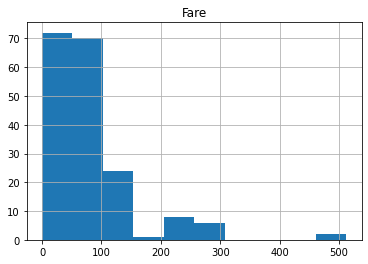

In [ ]:
train.hist(column="Fare");

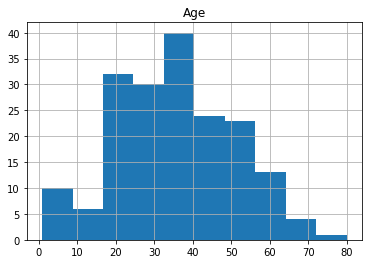

In [ ]:
train.hist(column="Age");

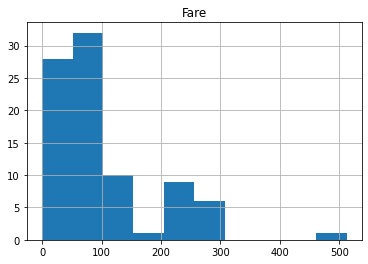

In [ ]:
test.hist(column="Fare");

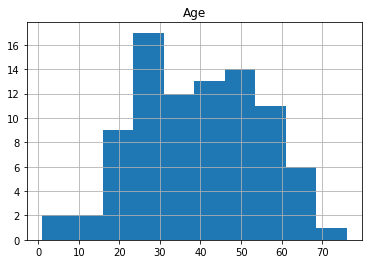

In [ ]:
test.hist(column="Age");

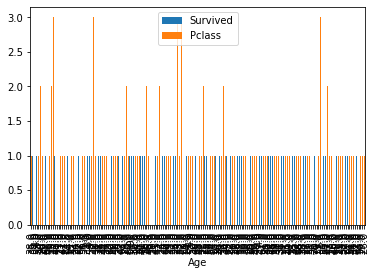

In [ ]:
train.plot(x="Age", y=["Survived", "Pclass"], kind="bar");